In [1]:
import os

#add the root directory
os.chdir('../')

# Visualize manifold trained on DNS vs on flamelet

In [2]:
from utils import *
from visualizations import *
import matplotlib.pyplot as plt
import pandas as pd
from loader import *
from os import listdir
from os.path import isfile, join
from scipy.io import loadmat
import matplotlib.cm as cm
from scipy.signal import find_peaks
from PCAfold.preprocess import center_scale

logging.disable(logging.CRITICAL) #disable the logging

In [10]:
data_path = 'data-files/'
path_data = 'data-files/'
nbr_species = 21
nbr_rows = 1536
nbr_cols = 1024

layer = 10 #chose layer to inspect

files = [i for i in listdir(data_path) if isfile(join(data_path + i))]
print(f"Number of files: {len(files)}")

state_space_names = []
state_space_source_names = [] #to check it is the same order as the state space
Not_species = ["T","U","V","W","X","Z"]
state_space = np.zeros((1,nbr_species))
data_state_space = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_state_space_source = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_mf = np.zeros((nbr_rows*nbr_cols,1))
data_T = np.zeros((nbr_rows*nbr_cols,1))

counter_state_space = 0
counter_state_space_source = 0

for file in files:
    if file.endswith('.mat'):
        print(f"Busy with {file}")

        data = loadmat(data_path + file)

        filename = file.removesuffix('.mat')
        file_data = np.array(data[filename])
        

        #if name of the file is not starting with an uppercase
        if(not file[0] == "R" and file[0].isupper() and file[0] not in Not_species):
            state_space_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space[:,counter_state_space] = flattened_data

            counter_state_space+=1

        elif(file[0] == "R"):
            state_space_source_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space_source[:,counter_state_space_source] = flattened_data

            counter_state_space_source+=1

        elif(file[0] == "Z"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_mf[:,0] = flattened_data
            
            print()
            print("mass fraction data done")
            print()

        elif(file[0] == "T"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_T[:,0] = flattened_data
            
            print()
            print("Temperature data done")
            print()

print(state_space_names)
print(f"counters of state space and sources are {counter_state_space} and {counter_state_space_source}")

Number of files: 98
Busy with curvature_Condi_3D_slices.mat
Busy with H2NN_3D_slice.mat
Busy with H2O2_3D_slice.mat
Busy with H2O_3D_slice.mat
Busy with H2_3D_slice.mat
Busy with HNO_3D_slice.mat
Busy with HO2_3D_slice.mat
Busy with HONO2_3D_slice.mat
Busy with HONO_3D_slice.mat
Busy with H_3D_slice.mat
Busy with N2H3_3D_slice.mat
Busy with N2O_3D_slice.mat
Busy with N2_3D_slice.mat
Busy with NH2_3D_slice.mat
Busy with NH_3D_slice.mat
Busy with NNH_3D_slice.mat
Busy with NO2_3D_slice.mat
Busy with NO_3D_slice.mat
Busy with N_3D_slice.mat
Busy with O2_3D_slice.mat
Busy with OH_3D_slice.mat
Busy with O_3D_slice.mat
Busy with RH2NN_3D_slice.mat
Busy with RH2O2_3D_slice.mat
Busy with RH2O_3D_slice.mat
Busy with RH2_3D_slice.mat
Busy with RHNO_3D_slice.mat
Busy with RHO2_3D_slice.mat
Busy with RHONO2_3D_slice.mat
Busy with RHONO_3D_slice.mat
Busy with RH_3D_slice.mat
Busy with RN2H3_3D_slice.mat
Busy with RN2O_3D_slice.mat
Busy with RN2_3D_slice.mat
Busy with RNH2_3D_slice.mat
Busy with RNH

In [11]:
filename_flamelet = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s3"
filename_metadata_flamelet = filename_flamelet + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

loader_flamelet = loadData(filename_species_names, path_metadata, filename_metadata_flamelet)
idx_species_removed_flamelet = loader_flamelet.metadata["idx species removed"]
model_flamelet= loader_flamelet.loadModel()
id_model_flamelet = loader_flamelet.metadata["Training_id"]
output_idx_flamelet = loader_flamelet.metadata["output species idx"]
idx_species_removed_flamelet = loader_flamelet.metadata["idx species removed"]
input_scaling_flamelet = loader_flamelet.metadata["input scaling"]
input_species_scaling_flamelet = loader_flamelet.metadata["input species scaling"]
input_species_bias_flamelet = loader_flamelet.metadata["input species bias"]
range_mf_flamelet  = loader_flamelet.metadata["range_mf"]

optimized_PV_flamelet = model_flamelet.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed_flamelet, axis=1))).detach().numpy()
optimized_PV_source_flamelet = model_flamelet.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed_flamelet, axis=1))).detach().numpy()

###########################################################################################################################################################################"


filename_DNS = "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_13Jul2025-hour_22h39_Tr35a_low_s6"
filename_metadata_DNS = filename_DNS + "_metadata.pkl"

loader_DNS = loadData(filename_species_names, path_metadata, filename_metadata_DNS)
idx_species_removed_DNS = loader_DNS.metadata["idx species removed"]
model_DNS = loader_DNS.loadModel()
id_model_DNS = loader_DNS.metadata["Training_id"]
output_idx_DNS = loader_DNS.metadata["output species idx"]
idx_species_removed_DNS = loader_DNS.metadata["idx species removed"]
input_scaling_DNS = loader_DNS.metadata["input scaling"]
input_species_scaling_DNS = loader_DNS.metadata["input species scaling"]
input_species_bias_DNS = loader_DNS.metadata["input species bias"]
range_mf_DNS  = loader_DNS.metadata["range_mf"]

optimized_PV_DNS = model_DNS.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed_DNS, axis=1))).detach().numpy()
optimized_PV_source_DNS = model_DNS.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed_DNS, axis=1))).detach().numpy()

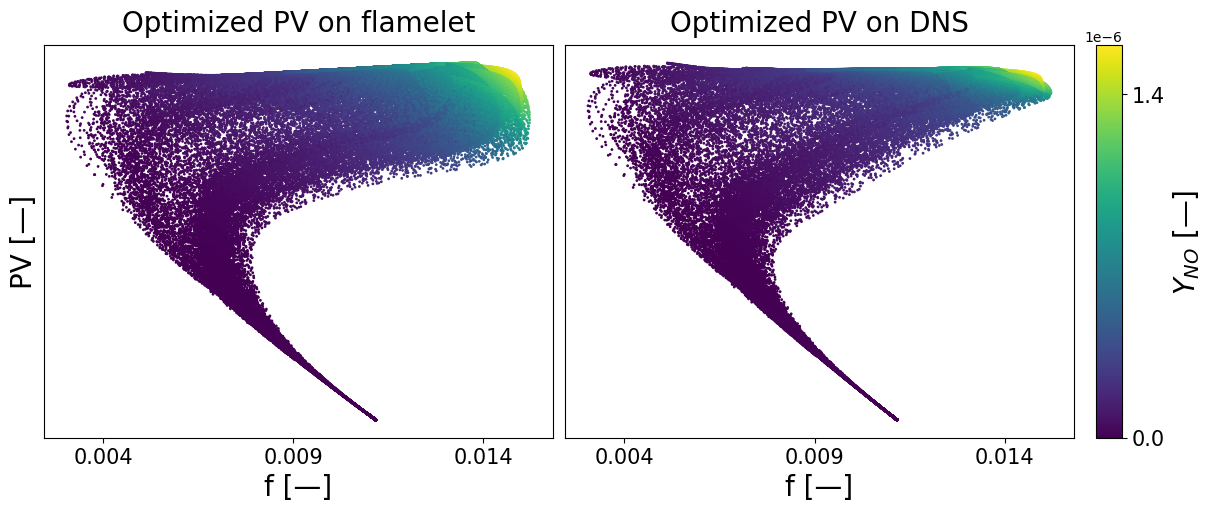

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, constrained_layout=True)

species = "NO"

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison PV from DNS vs flamelet/"
name = f"f-PV optimized on DNS vs optimized {id_model_flamelet} {id_model_DNS} - DNS - {species}.png"

# Left subplot (YPV)
sc1 = axes[0].scatter(data_mf, (optimized_PV_flamelet-optimized_PV_flamelet.min())/(optimized_PV_flamelet.max()-optimized_PV_flamelet.min()), c=data_state_space[:, state_space_names.index(species)], 
                       s=1, cmap='viridis', marker='o')
axes[0].set_title('Optimized PV on flamelet', fontsize=20, pad=10)
axes[0].set_xlabel('f [\u2014]', fontsize=20)
axes[0].set_ylabel('PV [\u2014]', fontsize=20)
axes[0].set_xticks([0.004, 0.009, 0.014])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_yticks([])
axes[0].grid(False)

# Right subplot (Optimized PV)
sc2 = axes[1].scatter(data_mf, -(optimized_PV_DNS-optimized_PV_DNS.min())/(optimized_PV_DNS.max()-optimized_PV_DNS.min())+1, c=data_state_space[:, state_space_names.index(species)], 
                       s=1, cmap='viridis', marker='o')
axes[1].set_title('Optimized PV on DNS', fontsize=20, pad=10)
axes[1].set_xlabel('f [\u2014]', fontsize=20)
axes[1].set_xticks([0.004, 0.009, 0.014])
axes[1].tick_params(axis='x', labelsize=15)
axes[1].grid(False)
axes[1].set_ylabel("")  # Remove duplicate ylabel

# Colorbar (only one, on the right)
cbar = fig.colorbar(sc2, ax=axes, location='right', aspect = 15, pad = 0.01)
cbar.set_ticks([0, 0.0000014])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(f'$Y_{{{species.replace("2", "_2")}}}$ [\u2014]', fontsize=20)

# Save and show
if save:
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')
plt.show()

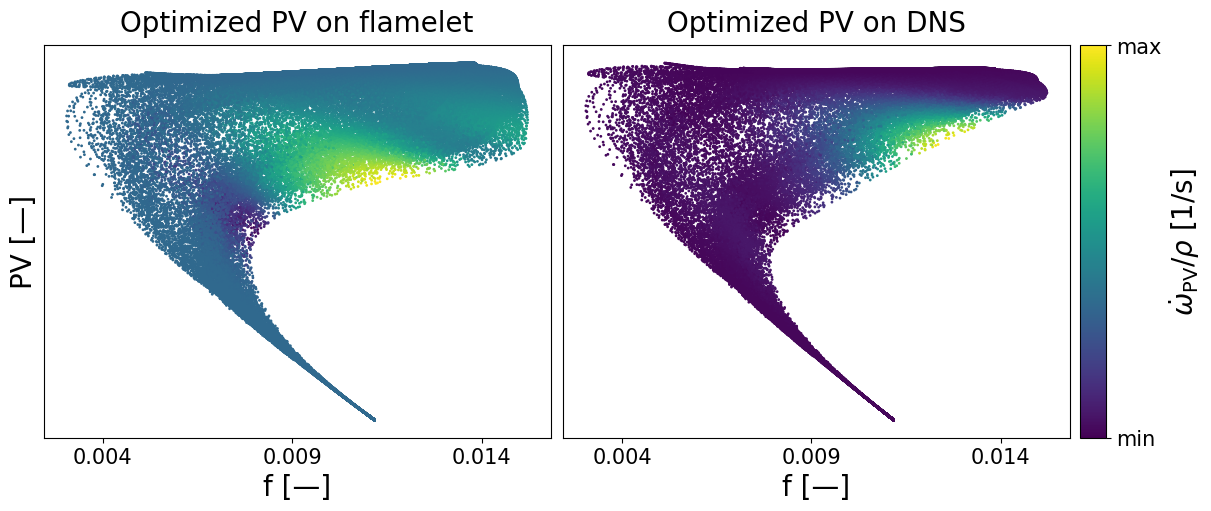

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, constrained_layout=True)

species = "NO"

save = False
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison PV from DNS vs flamelet/"
name = f"f-PV optimized on DNS vs optimized {id_model_flamelet} {id_model_DNS} - DNS - PVsource.png"

# Left subplot (YPV)
sc1 = axes[0].scatter(data_mf, (optimized_PV_flamelet-optimized_PV_flamelet.min())/(optimized_PV_flamelet.max()-optimized_PV_flamelet.min()), c=optimized_PV_source_flamelet, 
                       s=1, cmap='viridis', marker='o')
axes[0].set_title('Optimized PV on flamelet', fontsize=20, pad=10)
axes[0].set_xlabel('f [\u2014]', fontsize=20)
axes[0].set_ylabel('PV [\u2014]', fontsize=20)
axes[0].set_xticks([0.004, 0.009, 0.014])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_yticks([])
axes[0].grid(False)

# Right subplot (Optimized PV)
sc2 = axes[1].scatter(data_mf, -(optimized_PV_DNS-optimized_PV_DNS.min())/(optimized_PV_DNS.max()-optimized_PV_DNS.min())+1, c=-optimized_PV_source_DNS, 
                       s=1, cmap='viridis', marker='o')
axes[1].set_title('Optimized PV on DNS', fontsize=20, pad=10)
axes[1].set_xlabel('f [\u2014]', fontsize=20)
axes[1].set_xticks([0.004, 0.009, 0.014])
axes[1].tick_params(axis='x', labelsize=15)
axes[1].grid(False)
axes[1].set_ylabel("")  # Remove duplicate ylabel

# Colorbar (only one, on the right)
cbar = fig.colorbar(sc2, ax=axes, location='right', aspect = 15, pad = 0.01)
vmin, vmax = sc2.get_clim()
cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels(['min', 'max'])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\dot{\omega}_{\mathrm{PV}} / \rho$ [1/s]', fontsize=20)

# Save and show
if save:
    plt.savefig(pathSave + name, dpi=300, bbox_inches='tight')
plt.show()

## Visualize Dhat plots

In [3]:
path_variance = "data-files/costs/"
name_DNS = "variance_Tr35a_low_s6-bw_-6_2_100-dataset_low.npy"
name_flamelet = "variance_Tr35a_s3-bw_-6_2_100.npy"

penalty_function = 'log-sigma-over-peak'
power = 4
vertical_shift = 1

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

In [4]:
variance_flamelet = np.load(f"{path_variance}{name_flamelet}", allow_pickle=True).item()
variance_DNS = np.load(f"{path_variance}{name_DNS}", allow_pickle=True).item()

(derivative_flamelet, bandwidth_values_flamelet, max_derivative_flamelet) = normalized_variance_derivative(variance_flamelet)
(derivative_DNS, bandwidth_values_DNS, max_derivative_DNS) = normalized_variance_derivative(variance_DNS)

costsflamelet = cost_function_normalized_variance_derivative(variance_flamelet,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsDNS = cost_function_normalized_variance_derivative(variance_DNS,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

C:\Windows\Temp\ipykernel_12120\2127607368.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


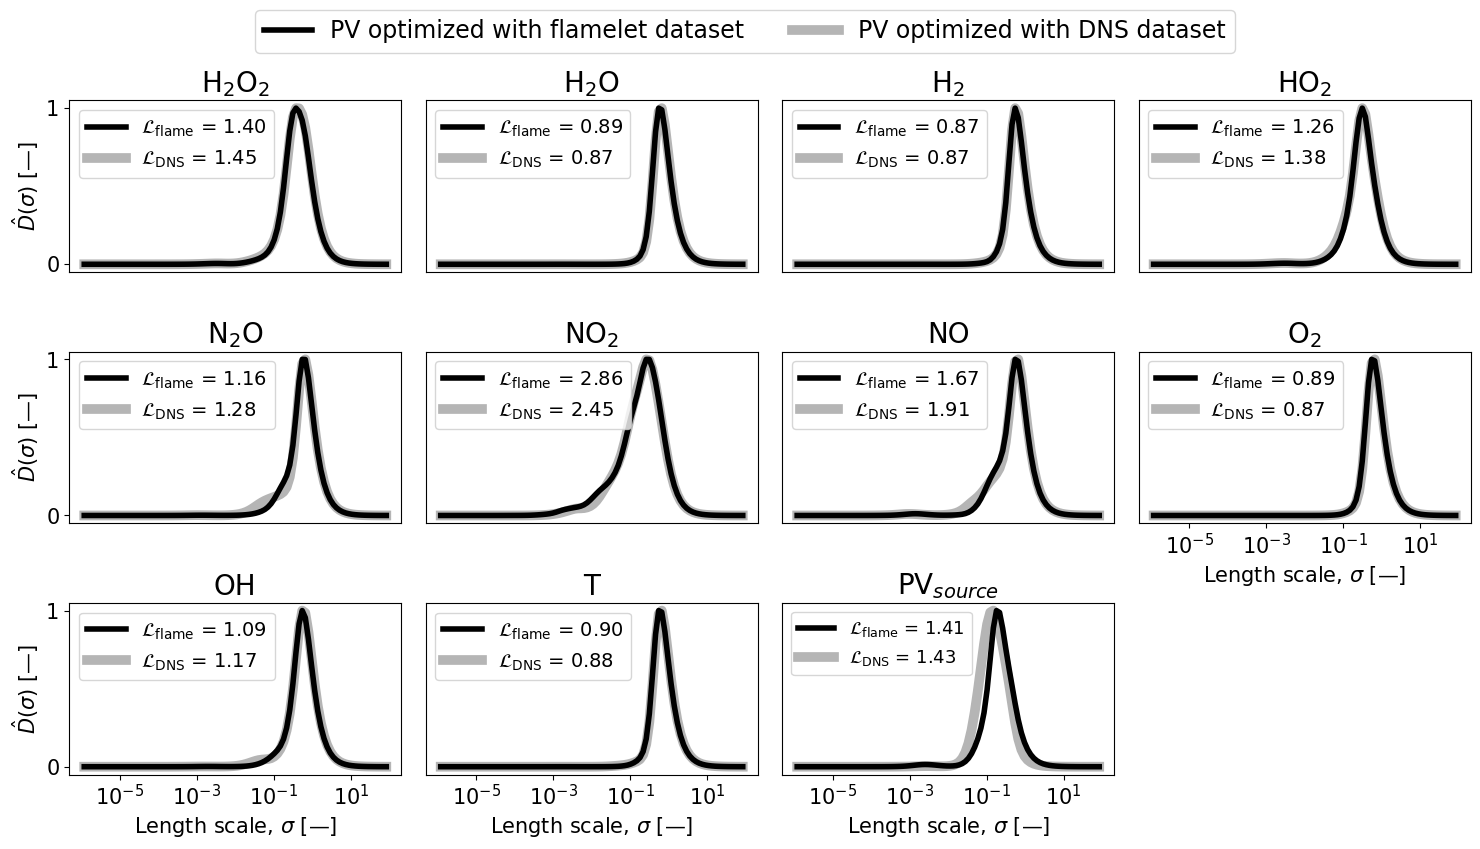

In [9]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison PV from DNS vs flamelet/"
name = "Dhat DNS vs flamelet PV - combined - DNS.png"

greys = cm.get_cmap('Greys')
keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_flamelet, derivative_flamelet[key], color = greys(1.0), zorder = 2,
            label=rf'$\mathcal{{L}}_{{\mathrm{{flame}}}}$ = {costsflamelet[i]:.2f}', linewidth = 4)
    ax.plot(bandwidth_values_DNS, derivative_DNS[key], color = greys(0.4), zorder = 1,
            label=rf'$\mathcal{{L}}_{{\mathrm{{DNS}}}}$ = {costsDNS[i]:.2f}', linewidth = 7, linestyle = "-")
    ax.set_xscale("log")
    if(i>=len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)
    
    if(key in ["PV1"]):
         ax.legend(fontsize = 13)
    else:
         ax.legend(fontsize = 14)

    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")
    ax.set_title(rf"{key}", fontsize=20)

for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["PV optimized with flamelet dataset", "PV optimized with DNS dataset"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()